<a href="https://colab.research.google.com/github/barani-bhoopalan/Python-Data-Visualization---Orders-Data/blob/master/Data_Visualization_Orders_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Visualization

In [4]:
  ## ===> Data Management <===

import pandas as pd
import numpy as np
##
## ===> Visualization <===
##
import seaborn as sns
import matplotlib.pyplot as plt

## Set the seaborn grid style. 
sns.set()
#number of Pandas columns to display.  Eight in this case.

pd.set_option( 'display.max_columns', 8 )

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:

##Read local file from google colab - upload file to google colab and it is stored in key
from google.colab import files 
uploaded = files.upload()

Saving customers.csv to customers.csv
Saving marketing.csv to marketing.csv
Saving orders.csv to orders.csv


In [6]:
##Print the list of files uploaded
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))


User uploaded file "customers.csv" with length 22972 bytes
User uploaded file "marketing.csv" with length 21007 bytes
User uploaded file "orders.csv" with length 7049479 bytes


In [0]:
import io
df_orders = pd.read_csv(io.StringIO(uploaded['orders.csv'].decode('utf-8')), parse_dates = [ 'Tdate' ] )

In [0]:
import io
df_customers = pd.read_csv(io.StringIO(uploaded['customers.csv'].decode('utf-8')))

In [0]:
import io
df_marketing = pd.read_csv(io.StringIO(uploaded['marketing.csv'].decode('utf-8')))

In [0]:
lst = [ 'Ddisc', 'Odisc', 'Cdisc', 'Pdisc' ]
df_orders[ 'Tdisc' ] = df_orders[ lst ].sum( axis = 1 )
df_orders[ 'Pprice' ] = df_orders.Lprice*( 1 - df_orders.Tdisc )
df_orders[ 'Rev' ] = df_orders.Usales * df_orders.Pprice

In [69]:
#Merge the data
df_orders_cust = pd.merge( df_orders, df_customers, on = 'CID' )
df = pd.merge( df_orders_cust, df_marketing, on = 'CID' )
df.head()

,Onum,CID,Tdate,Pline,...,Region,loyaltyProgram,buyerRating,buyerSatisfaction
0,585,1015,2004-01-25,Living Room,...,Midwest,Yes,Good,2
1,586,1015,2004-01-25,Living Room,...,Midwest,Yes,Good,2
2,587,1015,2004-01-25,Living Room,...,Midwest,Yes,Good,2
3,588,1015,2004-01-25,Living Room,...,Midwest,Yes,Good,2
4,589,1015,2004-01-25,Living Room,...,Midwest,Yes,Good,2


### A. HISTOGRAM

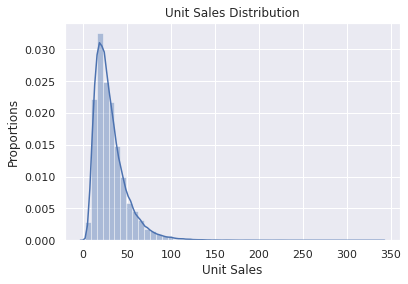

In [70]:
##
## Histogram of unit sales
##
ax = sns.distplot( df.Usales )
ax.set( title = 'Unit Sales Distribution', xlabel = 'Unit Sales', 
       ylabel = 'Proportions' );

Interpretation : Distribution --> highly skewed to the right The natural log can be used to normalize the display.

This next graph shows the distribution on a log scale

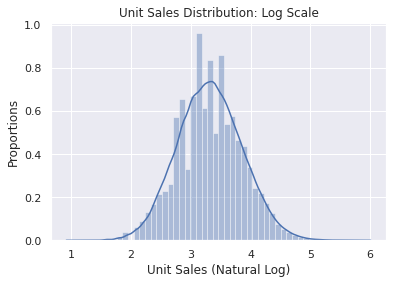

In [71]:
## Plot the natural log of unit sales

ax = sns.distplot( np.log1p( df.Usales ) )
ax.set( title = 'Unit Sales Distribution: Log Scale', 
       xlabel = 'Unit Sales (Natural Log)',
       ylabel = 'Proportions' );

Interpretation : The natural log transformation changed the distribution to a normal looking distribution

### B. BOXPLOT

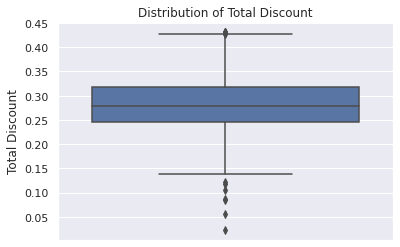

In [72]:
#boxplot for total discounts
ax = sns.boxplot( y = 'Tdisc', data = df )
ax.set( title = 'Distribution of Total Discount', ylabel = 'Total Discount' );

Interpretation : The distribution is fairly symmetrical and displays for the entire market.
Below displays region-wise

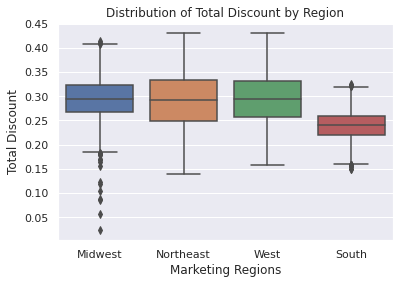

In [73]:
# Total discount distribution region-wise
ax = sns.boxplot( x = 'Region', y = 'Tdisc', data = df )
ax.set( title = 'Distribution of Total Discount by Region', ylabel = 'Total Discount', 
       xlabel = 'Marketing Regions' );

Interpretation : The discounts are the lowest in the Southern Region while the Midwest has a large number of very low discounts. Also, the discounts in the Southern Region is small relative to that in the other three regions.

Below displays the drill down report on the discounts to verify the differences for the Southern Region.

Summary statistics for the discounts:
            value                                                      
            count      mean       std    min    25%   50%    75%    max
variable                                                               
Cdisc     15831.0  0.069813  0.020228  0.035  0.052  0.07  0.087  0.105
Ddisc     15831.0  0.079939  0.008658  0.065  0.072  0.08  0.087  0.095
Odisc     15831.0  0.050175  0.014507  0.025  0.038  0.05  0.063  0.075
Pdisc     15831.0  0.040134  0.011540  0.020  0.030  0.04  0.050  0.060


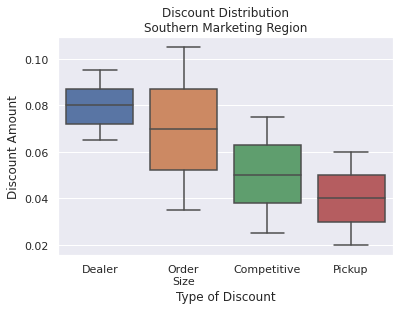

In [43]:
## Select the discounts for the Southern Region

lst = [ 'Ddisc', 'Cdisc', 'Odisc', 'Pdisc' ]
df_south = df.loc[ df.Region == 'South', lst ]

# Melt the data from wide- to long-form.

df_melt = pd.melt( df_south )

## Get summary statistics

grp = df_melt.groupby( 'variable' ).describe()
print( 'Summary statistics for the discounts:\n{}'.format( grp ) )

## boxplot

ax = sns.boxplot( x = 'variable', y = 'value', data = df_melt )
ax.set( title = 'Discount Distribution\nSouthern Marketing Region', 
        xlabel = 'Type of Discount',
        ylabel = 'Discount Amount')

##meaningful labels

ax.set_xticklabels( [ 'Dealer', 'Order\nSize', 'Competitive', 'Pickup' ] );

Interpretation :The dealer discount tends to be the largest while the order discount has the most variation.

###C. SCATTERPLOT

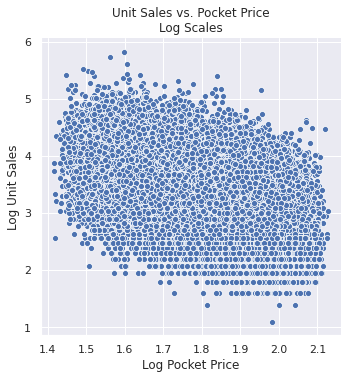

In [74]:
#To obtain symmetrical distribution related to price and sales
df[ 'log_Pprice' ] = np.log1p( df.Pprice )
df[ 'log_Usales' ] = np.log1p( df.Usales )

# Plot the logged data

ax = sns.relplot( x = 'log_Pprice', y = 'log_Usales', data = df )
ax.set( title = 'Unit Sales vs. Pocket Price\nLog Scales', xlabel = 'Log Pocket Price', 
       ylabel = 'Log Unit Sales' );

Interpretation : A negative relationship is understood from the plot

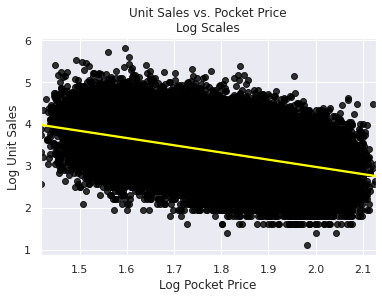

In [75]:
ax = sns.regplot( x = 'log_Pprice', y = 'log_Usales', data = df, 
                 scatter_kws = { 'color':'black' },
                 line_kws ={ 'color':'yellow' } )
ax.set( title = 'Unit Sales vs. Pocket Price\nLog Scales', 
       xlabel = 'Log Pocket Price', ylabel = 'Log Unit Sales' );

Interpretation : The regression line shows a negative relationship between price and sales

#### i - Random Sampling

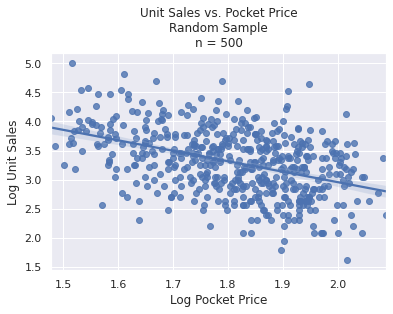

In [76]:
smpl = df.sample( n = 500, random_state = 1234, replace = False )

ax = sns.regplot( x = 'log_Pprice', y = 'log_Usales', data = smpl )
ax.set( title = 'Unit Sales vs. Pocket Price\nRandom Sample\nn = 500', 
       ylabel = 'Log Unit Sales', xlabel = 'Log Pocket Price' );

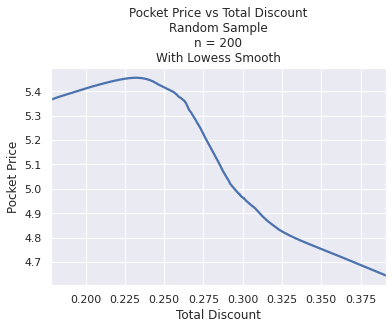

In [77]:
smp2 = df.sample( n = 200, random_state = 1234 )

ax = sns.regplot( x = 'Tdisc', y = 'Pprice', data = smp2, lowess = True, scatter = False )
ax.set( title = 'Pocket Price vs Total Discount\nRandom Sample\nn = 200\nWith Lowess Smooth', 
       xlabel = 'Total Discount', ylabel = 'Pocket Price' );

#### ii - Contour Plot


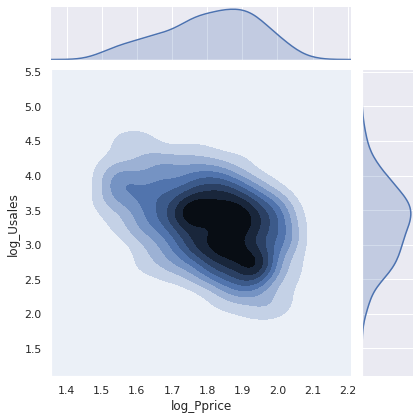

In [78]:
ax = sns.jointplot( x = 'log_Pprice', y = 'log_Usales', kind = 'kde', data = smpl );

Interpretation : The dark spot in the middle shows the concentration of the data points + negative relationship between sales and price is evident

#### iii - Hexbin Plot

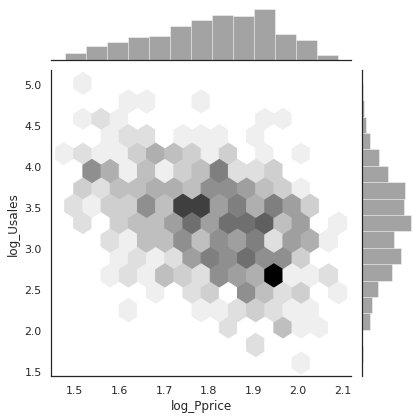

In [79]:
with sns.axes_style( 'white' ):
    ax = sns.jointplot( x = 'log_Pprice', y = 'log_Usales', 
                       kind = 'hex', color = 'k', data = smpl );

#### iv - Lowess Curve

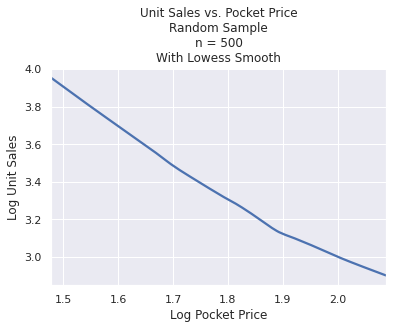

In [80]:
ax = sns.regplot( x = 'log_Pprice', y = 'log_Usales', lowess = True, scatter = False, data = smpl )
ax.set( title = 'Unit Sales vs. Pocket Price\nRandom Sample\nn = 500\nWith Lowess Smooth', 
       ylabel = 'Log Unit Sales', xlabel = 'Log Pocket Price' );

### D. TREND IN DATA

In [81]:
#Subsetting the date indicator and the Dealer discount

lst = [ 'Tdate', 'Ddisc' ]
data = df[ lst ].copy()

data.set_index( 'Tdate', inplace = True )
data.head()

## Group the data by months and calculate the mean discount for each month.

grp = data.resample( 'M' ).mean()
grp.head().style.set_caption( 'Grouped Data' )


,Ddisc
Tdate,
2003-06-30 00:00:00,0.108419
2003-07-31 00:00:00,0.107782
2003-08-31 00:00:00,0.112491
2003-09-30 00:00:00,0.115927
2003-10-31 00:00:00,0.122851


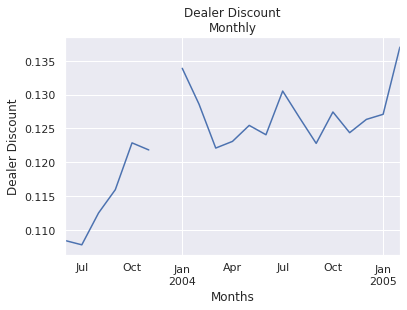

In [82]:
##
ax = grp.plot( y = 'Ddisc', legend = False )
ax.set( title = 'Dealer Discount\nMonthly', ylabel = 'Dealer Discount', xlabel = 'Months' );

#### E. ANOMALIES IN DATA

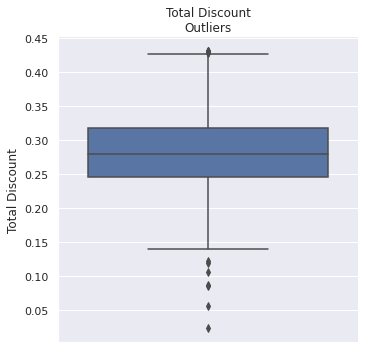

In [83]:
ax = sns.catplot( 'Tdisc', kind = 'box', orient = 'v', data = df_orders )
ax.set( title = 'Total Discount\nOutliers', ylabel = 'Total Discount', xlabel = '' );